In [26]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras import models
import joblib
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
DATASET_PATH = 'dataset_020/color_dataset_concat.csv'
MODEL_PATH = os.path.join('MODEL', 'color_model.keras')
SCALER_PATH = os.path.join('MODEL', 'color_scaler.pkl')

In [28]:
# Load the dataset
df = pd.read_csv(DATASET_PATH)

X = df[['R', 'G', 'B', 'W']]
y = df['control_value']

In [29]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, SCALER_PATH)

['MODEL\\color_scaler.pkl']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [97]:
inputs = layers.Input(shape=(4,))
reshaped_inputs = layers.Reshape((4, 1))(inputs)

# Architecture
# CNN branch
conv1 = layers.Conv1D(64, kernel_size=2, activation='relu')(reshaped_inputs)
conv2 = layers.Conv1D(128, kernel_size=2, activation='relu')(conv1)
flattened = layers.Flatten()(conv2)

# Fully connected branch
fc = layers.Dense(256, activation='relu')(inputs)
fc = layers.Dense(256, activation='relu')(fc)

# Combine CNN and FC branches
combined = layers.concatenate([flattened, fc])

# Final dense layers
combined = layers.Dense(512, activation='relu')(combined)
combined = layers.Dense(128, activation='relu')(combined)
combined = layers.Dense(32, activation='relu')(combined)
output = layers.Dense(1)(combined)

model =[]
# Create hybrid model
model = models.Model(inputs=inputs, outputs=output)


# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.00001), metrics=['mae', 'mse'])

In [98]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
250/250 [==============================] - 3s 8ms/step - loss: 0.2238 - mae: 0.3899 - mse: 0.2238 - val_loss: 0.1544 - val_mae: 0.3174 - val_mse: 0.1544
Epoch 2/50
250/250 [==============================] - 2s 7ms/step - loss: 0.1171 - mae: 0.2772 - mse: 0.1171 - val_loss: 0.0797 - val_mae: 0.2325 - val_mse: 0.0797
Epoch 3/50
250/250 [==============================] - 2s 7ms/step - loss: 0.0624 - mae: 0.2067 - mse: 0.0624 - val_loss: 0.0493 - val_mae: 0.1813 - val_mse: 0.0493
Epoch 4/50
250/250 [==============================] - 2s 7ms/step - loss: 0.0453 - mae: 0.1720 - mse: 0.0453 - val_loss: 0.0390 - val_mae: 0.1569 - val_mse: 0.0390
Epoch 5/50
250/250 [==============================] - 2s 7ms/step - loss: 0.0365 - mae: 0.1506 - mse: 0.0365 - val_loss: 0.0315 - val_mae: 0.1373 - val_mse: 0.0315
Epoch 6/50
250/250 [==============================] - 2s 8ms/step - loss: 0.0294 - mae: 0.1303 - mse: 0.0294 - val_loss: 0.0258 - val_mae: 0.1193 - val_mse: 0.0258
Epoch 7/50
250/2

In [1]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

NameError: name 'model' is not defined

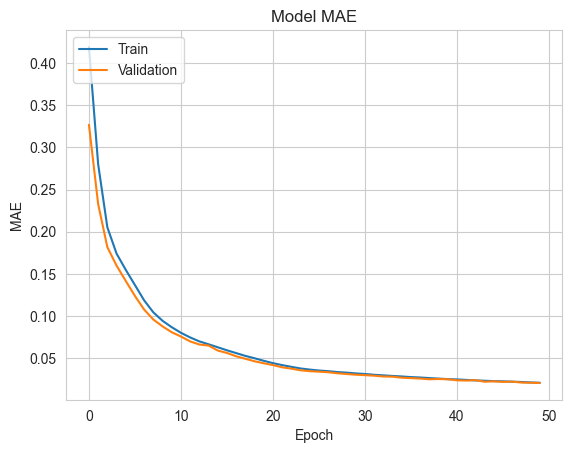

In [90]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

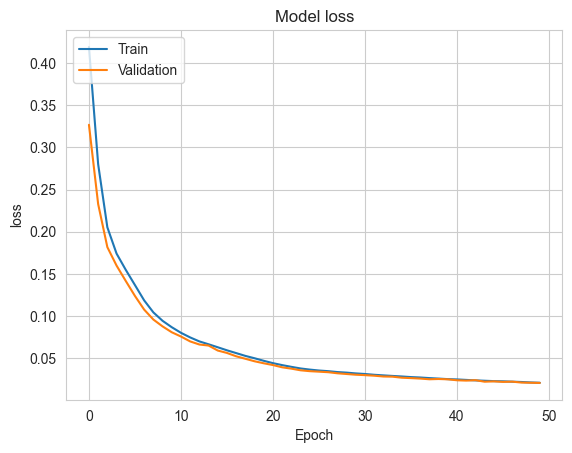

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
model.save(MODEL_PATH)

In [92]:
# Use the model for prediction
predictions = model.predict(X_test)

125/125 [==============================] - 0s 2ms/step


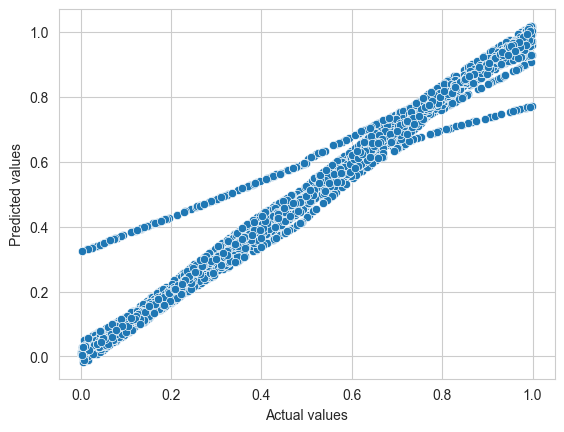

In [93]:
# Plot the predictions against the actual values
sns.scatterplot(x=y_test, y=predictions.flatten())
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


In [94]:
X_train.shape[1]

4

Best Prediction Errors:
Index: 2118, Absolute Error: 2.049386501307149e-06
Index: 568, Absolute Error: 4.999160766572253e-06
Index: 2644, Absolute Error: 5.5398941040119e-06
Index: 2938, Absolute Error: 8.049488067651822e-06
Index: 2392, Absolute Error: 1.1333703994753641e-05
Index: 2513, Absolute Error: 1.3669013977035682e-05
Index: 961, Absolute Error: 1.804113388059747e-05
Index: 2053, Absolute Error: 1.8302917480506053e-05
Index: 507, Absolute Error: 2.0220279693616838e-05
Index: 1059, Absolute Error: 2.4322509765584144e-05

Worst Prediction Errors:
Index: 1546, Absolute Error: 0.14230163383483885
Index: 2031, Absolute Error: 0.14492513370513915
Index: 622, Absolute Error: 0.14498105907440184
Index: 3859, Absolute Error: 0.14665893459320067
Index: 503, Absolute Error: 0.147295006275177
Index: 2680, Absolute Error: 0.14883084726333617
Index: 2159, Absolute Error: 0.1494734754562378
Index: 3951, Absolute Error: 0.1504092812538147
Index: 302, Absolute Error: 0.15050878238677978
Index:

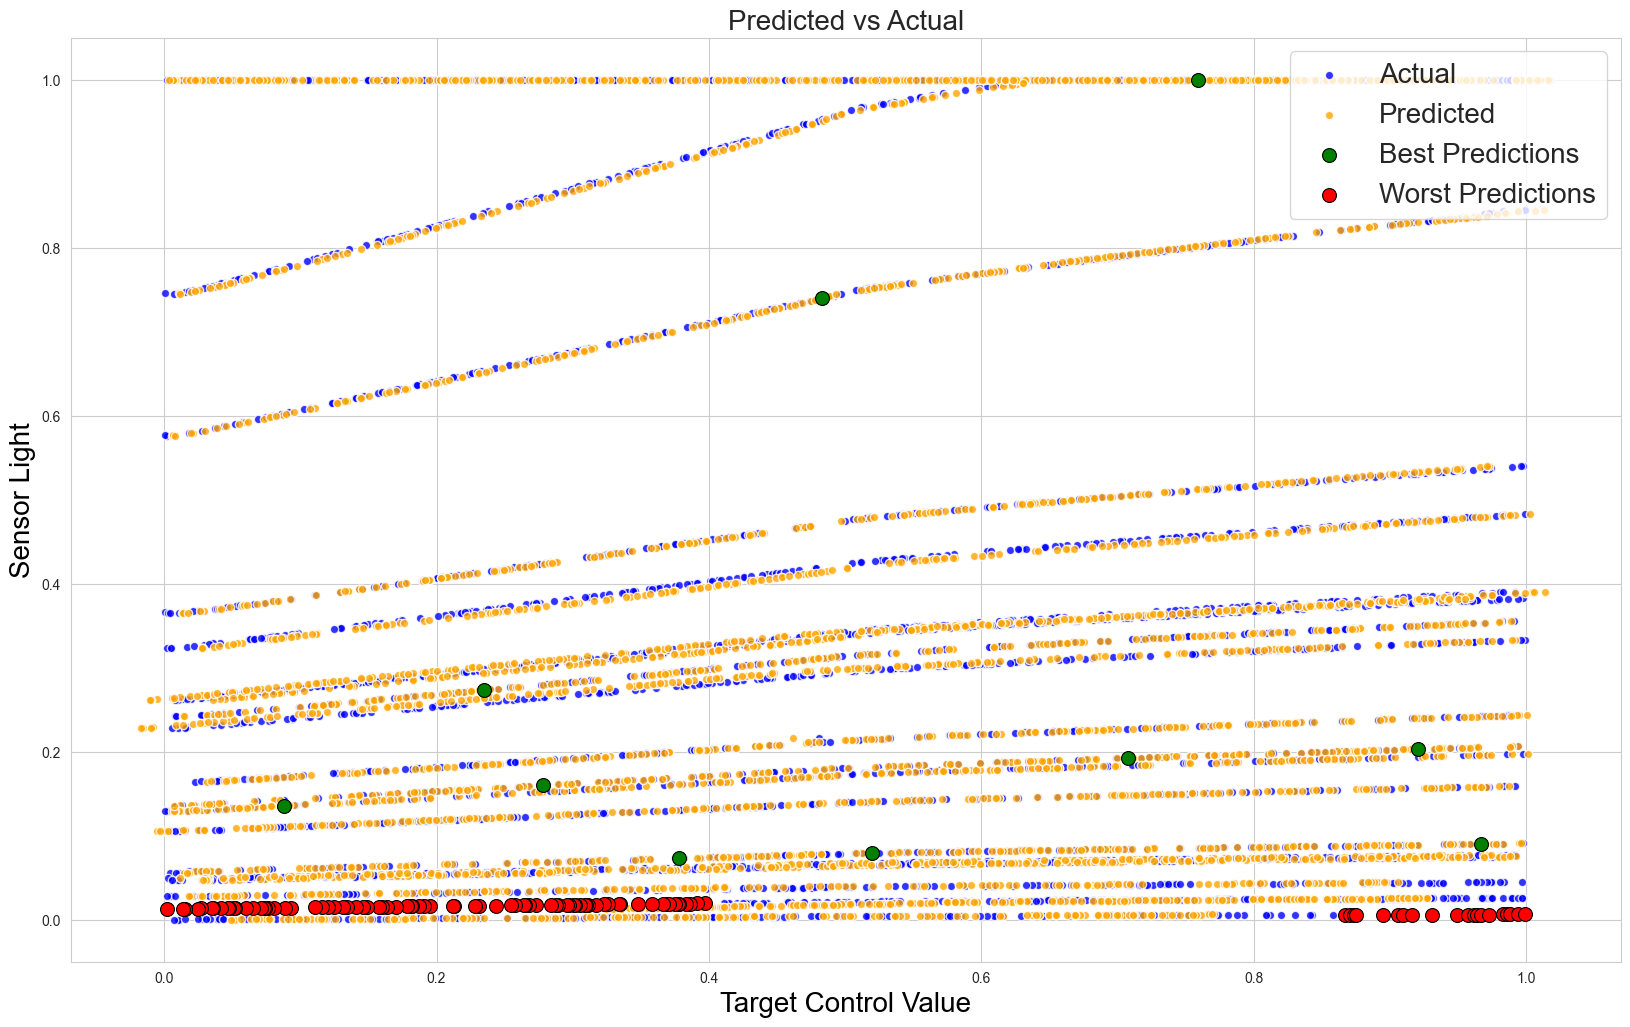

In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index of y_test to allow direct indexing after the train-test split
y_test = y_test.reset_index(drop=True)

# Calculate prediction errors
errors = predictions.flatten() - y_test

# Get the indices of the best and worst predictions
best_pred_indices = np.argsort(np.abs(errors))[:10]  # Indices of the 10 best predictions
worst_pred_indices = np.argsort(np.abs(errors))[-100:]  # Indices of the 10 worst predictions



absolute_errors = np.abs(errors)

best_pred_errors = absolute_errors.iloc[best_pred_indices]
worst_pred_errors = absolute_errors.iloc[worst_pred_indices]

print("Best Prediction Errors:")
for i, index in enumerate(best_pred_indices):
    print(f"Index: {index}, Absolute Error: {best_pred_errors.iloc[i]}")

print("\nWorst Prediction Errors:")
for i, index in enumerate(worst_pred_indices):
    print(f"Index: {index}, Absolute Error: {worst_pred_errors.iloc[i]}")
    



# Adjust your slicing here, if necessary
slice_min = 0
slice_max = len(y_test)  
col_slice = 3  # The feature  to plot


sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
plt.title("Predicted vs Actual", fontsize=20)

sns.scatterplot(x=y_test[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="blue", label="Actual", linewidth=1, alpha=0.8)
sns.scatterplot(x=predictions.flatten()[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="orange", label="Predicted", linewidth=1, alpha=0.8)

# Highlight the best predictions
sns.scatterplot(x=y_test[best_pred_indices], y=X_test[best_pred_indices, col_slice], color="green", label="Best Predictions", s=100, edgecolor='black')

# Highlight the worst predictions
sns.scatterplot(x=y_test[worst_pred_indices], y=X_test[worst_pred_indices, col_slice], color="red", label="Worst Predictions", s=100, edgecolor='black')


plt.xlabel('Target Control Value', color='black', fontsize=20)
plt.ylabel('Sensor Light', color='black', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()
